# 人工智慧＿期中報告＿牛排部位辨識

## 學號： C107118127
## 姓名： 洪仁傑
## 教授： 黃承龍

# 情境介紹

### 牛隻的整個身體部位的肉質口感與烹調方式皆不盡相同，因此想透過電腦的輔助，以人工智慧去辨識客人所購買的肉品，並提供相應的烹調方式，以及相關的牛肉知識

![](./image/beef_cut.jpeg)
![](./image/beef_cut_2.jpeg)

# 資料及介紹

## 資料類別
### 六種類別
* ChuckEyeRoll 梅花
* ChuckFlap 翼板
* NewYork 紐約客
* OysterBlade 板腱
* Ribeye 肋眼
* ShortRibBoneless 無骨小排
* Tenderloin 菲力

## 資料及圖片數量
各類別約60張左右的圖片

## 資料來源
* 從Google 搜尋圖片
* 裕賀牛觀光工廠
* 資料集連結：
https://drive.google.com/drive/folders/1zpKipfkF2e9WHf7Du7cp0a0EmvF2NAAC?usp=sharing

# 模型訓練
## 圖片讀取

In [34]:
from keras_preprocessing.image import ImageDataGenerator

In [35]:
directory = "./ZDataset"
input_shape = (150, 150)

In [36]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
        validation_split=0.1 # 切 90/10
        )

In [37]:
train_generator = train_datagen.flow_from_directory(
        directory,
        target_size=input_shape,
        batch_size=32,
        class_mode='binary',
        subset='training')

Found 332 images belonging to 6 classes.


In [38]:
# 測試資料
validation_generator = train_datagen.flow_from_directory(
        directory,
        target_size=input_shape,
        batch_size=32,
        class_mode='binary',
        subset='validation')

Found 35 images belonging to 6 classes.


## 建立CNN模型
###  配合輸出層節點數，Label資料格式轉成 6 個節點輸出

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import  BatchNormalization

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [40]:
#input_shape=(64,64,3)
#input_shape=(128,128,3)
#input_shape=(150,150,3)
#input_shape=(224,224,3)

# conv #1 第1層卷積
# feature map 卷积核的数目64個   kernel卷積核大小3*3   
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# conv #2 第2層卷積
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# conv #3 第3層卷積
model.add(Conv2D(16, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 推平成一行
model.add(Flatten())

# Dense全連接層 256個神經元
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Dense全連接層 64個神經元
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Dense全連接層 輸出節點2個神經元
model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
activation_3 (Activation)    (None, 150, 150, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        18464     
_________________________________________________________________
activation_4 (Activation)    (None, 75, 75, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 16)       

### Compile

In [41]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

###  Checkpoint & EarlyStopping

In [42]:
checkpoint_filepath = './model/best_cnn_model_2.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    # save_weights_only=True,
    #monitor='val_loss',
    #mode='min',
    
    monitor='val_accuracy', # 越大越好。＃ val_lose 越小越好
    mode='max',
    save_best_only=True,
)

In [43]:
early_stopping = EarlyStopping(patience=5)

## model fit

In [44]:
%%time
# It will takes more than 10 minutes.
hist = model.fit(
    train_generator,
    epochs=120,
    batch_size=32,
    validation_data=validation_generator,
    shuffle= True, 
    verbose=1,
    # callbacks=[checkpoint, early_stopping],
) 

Epoch 1/120
11/11 [==============================] - 12s 1s/step - loss: 2.3608 - accuracy: 0.1898 - val_loss: 3.1147 - val_accuracy: 0.1714
Epoch 2/120
11/11 [==============================] - 15s 1s/step - loss: 2.1264 - accuracy: 0.2380 - val_loss: 3.3563 - val_accuracy: 0.1429
Epoch 3/120
11/11 [==============================] - 11s 997ms/step - loss: 1.9251 - accuracy: 0.2530 - val_loss: 2.4248 - val_accuracy: 0.1714
Epoch 4/120
11/11 [==============================] - 10s 879ms/step - loss: 1.9263 - accuracy: 0.2440 - val_loss: 2.2612 - val_accuracy: 0.2000
Epoch 5/120
11/11 [==============================] - 10s 868ms/step - loss: 1.8767 - accuracy: 0.2892 - val_loss: 2.1335 - val_accuracy: 0.1429
Epoch 6/120
11/11 [==============================] - 9s 850ms/step - loss: 1.7437 - accuracy: 0.3223 - val_loss: 2.0990 - val_accuracy: 0.2286
Epoch 7/120
11/11 [==============================] - 10s 919ms/step - loss: 1.7481 - accuracy: 0.3253 - val_loss: 1.9097 - val_accuracy: 0.2000

### 準確度

In [45]:
# Generate generalization metrics
score = model.evaluate(validation_generator, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 3.026221990585327 / Test accuracy: 0.4571428596973419


In [46]:
score_1 = model.evaluate(validation_generator)
print(score_1)

2/2 [==============================] - 0s 16ms/step - loss: 3.1579 - accuracy: 0.3714
[3.157850503921509, 0.37142857909202576]


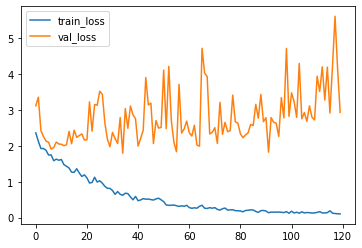

In [47]:
from matplotlib import pyplot as plt
plt.plot(hist.history['loss'], label="train_loss")
plt.plot(hist.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

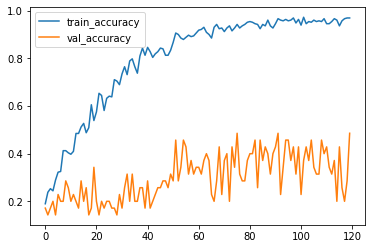

In [48]:
plt.plot(hist.history['accuracy'], label="train_accuracy")
plt.plot(hist.history['val_accuracy'], label="val_accuracy")
plt.legend()
plt.show()

## 模型存擋

In [49]:
model.save('./model/beef_cnn_3.hdf5')

# 資料驗證

In [50]:
import cv2
def read_image(file_path, target_size=(128, 128)):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) # BRG
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 轉成RGB 這樣跟原圖才一樣
    return cv2.resize(img, target_size, interpolation=cv2.INTER_CUBIC)

In [51]:
CHANNELS = 3
import numpy as np
def prep_data(images, target_size=(128, 128)):
    count = len(images)
    #data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8) #通道在前
    data = np.ndarray((count, target_size[1], target_size[0], CHANNELS), dtype=np.uint8) #通道在後
    for i, image_file in enumerate(images):
        image = read_image(image_file, target_size)
        #data[i] = image.T # #通道在前
        data[i] = image #通道在後
        if i%250 == 0: print('Processed {} of {}'.format(i, count))
    print('shape:{}'.format(data.shape))
    return data

In [52]:
labels = ['ChuckEyeRoll','ChuckFlap','NewYork','OysterBlade','Ribeye','ShortRibBoneless','Tenderloin']
Chineselabels = ['梅花','翼板','紐約客','板腱','肋眼','無骨小排','菲力']

## 無骨小排

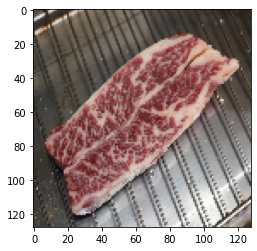

In [53]:
img_path = './dataset_test/ShortRibBoneless/005.jpeg'
plt.imshow(read_image( img_path ))

In [54]:
target_size=(150, 150)
x = prep_data([img_path], target_size=target_size)

Processed 0 of 1
shape:(1, 150, 150, 3)


In [55]:
x = x/255 #尺度化 必要步驟!

In [56]:
predictClass = model.predict_classes(x)[0]
print(labels[predictClass],Chineselabels[predictClass])

ShortRibBoneless 無骨小排


## 翼板

Processed 0 of 1
shape:(1, 150, 150, 3)


array([[8.4551628e-04, 9.3873137e-01, 3.3297294e-04, 1.2360608e-03,
        1.9223006e-02, 3.9631013e-02]], dtype=float32)

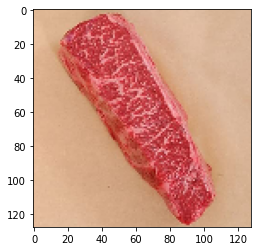

In [57]:
img_path = './dataset_test/ChuckFlap/013.jpeg'
plt.imshow(read_image( img_path ))
target_size=(150, 150)
x = prep_data([img_path], target_size=target_size)
x = x/255 #尺度化 必要步驟!
model.predict(x)

In [58]:
predictClass = model.predict_classes(x)
predictClass
predictClass = predictClass[0]
print("\n 圖片路徑：",img_path,"\n 類別：",predictClass,"\n 類別名稱：",labels[predictClass],Chineselabels[predictClass])


 圖片路徑： ./dataset_test/ChuckFlap/013.jpeg 
 類別： 1 
 類別名稱： ChuckFlap 翼板


## 板腱

Processed 0 of 1
shape:(1, 150, 150, 3)


array([[6.7090514e-05, 1.7913379e-07, 5.6880674e-09, 9.9986506e-01,
        1.8424869e-05, 4.9226317e-05]], dtype=float32)

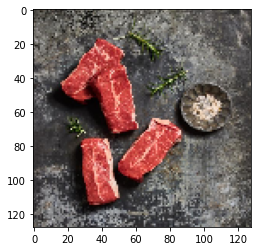

In [69]:
img_path = './dataset_test/OysterBlade/038.jpeg'
plt.imshow(read_image( img_path ))
target_size=(150, 150)
x = prep_data([img_path], target_size=target_size)
x = x/255 #尺度化 必要步驟!
model.predict(x)

In [70]:
predictClass = model.predict_classes(x)
predictClass
predictClass = predictClass[0]
print("\n 圖片路徑：",img_path,"\n 類別：",predictClass,"\n 類別名稱：",labels[predictClass],Chineselabels[predictClass])


 圖片路徑： ./dataset_test/OysterBlade/038.jpeg 
 類別： 3 
 類別名稱： OysterBlade 板腱


## 肋眼

Processed 0 of 1
shape:(1, 150, 150, 3)


array([[2.1822341e-01, 3.1490126e-01, 4.3541906e-05, 7.5794727e-02,
        3.8860202e-01, 2.4350418e-03]], dtype=float32)

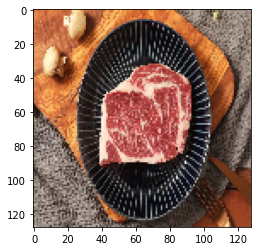

In [61]:
# img_path = './dataset/Ribeye/DSC_9182.jpeg'
img_path = './dataset_test/Ribeye/010.jpeg'
plt.imshow(read_image( img_path ))
target_size=(150, 150)
x = prep_data([img_path], target_size=target_size)
x = x/255 #尺度化 必要步驟!
model.predict(x)

In [62]:
predictClass = model.predict_classes(x)
predictClass
predictClass = predictClass[0]
print("\n 圖片路徑：",img_path,"\n 類別：",predictClass,"\n 類別名稱：",labels[predictClass],Chineselabels[predictClass])


 圖片路徑： ./dataset_test/Ribeye/010.jpeg 
 類別： 4 
 類別名稱： Ribeye 肋眼


## 牛梅花

Processed 0 of 1
shape:(1, 150, 150, 3)


array([[9.9999368e-01, 2.1274649e-07, 1.5014176e-11, 4.4578229e-08,
        2.9701789e-08, 6.1235769e-06]], dtype=float32)

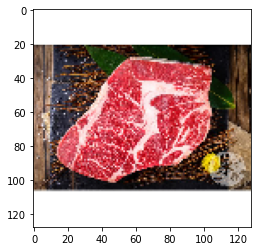

In [63]:
# img_path = './dataset/Ribeye/DSC_9182.jpeg'
img_path = './dataset_test/ChuckEyeRoll/010.jpeg'
plt.imshow(read_image( img_path ))
target_size=(150, 150)
x = prep_data([img_path], target_size=target_size)
x = x/255 #尺度化 必要步驟!
model.predict(x)

In [64]:
predictClass = model.predict_classes(x)
predictClass
predictClass = predictClass[0]
print("\n 圖片路徑：",img_path,"\n 類別：",predictClass,"\n 類別名稱：",labels[predictClass],Chineselabels[predictClass])


 圖片路徑： ./dataset_test/ChuckEyeRoll/010.jpeg 
 類別： 0 
 類別名稱： ChuckEyeRoll 梅花


## 紐約客

Processed 0 of 1
shape:(1, 150, 150, 3)


array([[3.5274297e-02, 1.1612027e-04, 9.2176116e-01, 1.2577670e-04,
        1.1869643e-02, 3.0853009e-02]], dtype=float32)

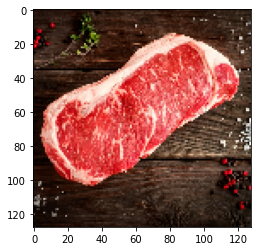

In [72]:
# img_path = './dataset/Ribeye/DSC_9182.jpeg'
img_path = './dataset_test/NewYork/009.jpeg'
plt.imshow(read_image( img_path ))
target_size=(150, 150)
x = prep_data([img_path], target_size=target_size)
x = x/255 #尺度化 必要步驟!
model.predict(x)

In [73]:
predictClass = model.predict_classes(x)
predictClass
predictClass = predictClass[0]
print("\n 圖片路徑：",img_path,"\n 類別：",predictClass,"\n 類別名稱：",labels[predictClass],Chineselabels[predictClass])


 圖片路徑： ./dataset_test/NewYork/009.jpeg 
 類別： 2 
 類別名稱： NewYork 紐約客
